In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline

# Define the sectors and their descriptions
sectors = {
    'XLB': 'Materials',
    'XLY': 'Consumer Discretionary',
    'XLF': 'Financials',
    'XLP': 'Consumer Staples',
    'XLV': 'Health Care',
    'XLU': 'Utilities',
    'XLE': 'Energy',
    'XLI': 'Industrials',
    'XLK': 'Technology',
}

start_date = '2002-01-01'
end_date = '2023-06-28'

# Create a mapping from month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [2]:
# Download S&P 500 data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate monthly returns
sp500_data = sp500_data.resample('M').last() 
sp500_data['monthly_return'] = sp500_data['Close'].pct_change()

# Calculate average return for each month
sp500_monthly_avg_return = sp500_data.groupby(sp500_data.index.month)['monthly_return'].mean()

# Drop rows with NaN values in 'monthly_return'
sp500_data = sp500_data.dropna()

# Calculate percentage of positive months
positive_counts = sp500_data.groupby(sp500_data.index.month).apply(lambda x: (x['monthly_return'] > 0).sum())
total_counts = sp500_data.groupby(sp500_data.index.month).size()

sp500_positive_month_percentage = positive_counts / total_counts

# Fill NaN values with 0
sp500_positive_month_percentage = sp500_positive_month_percentage.fillna(0)


[*********************100%***********************]  1 of 1 completed


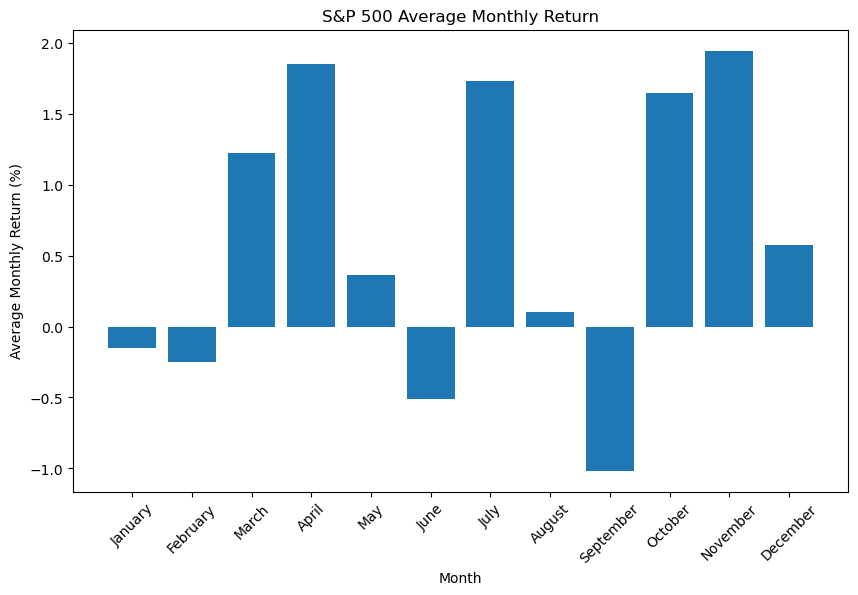

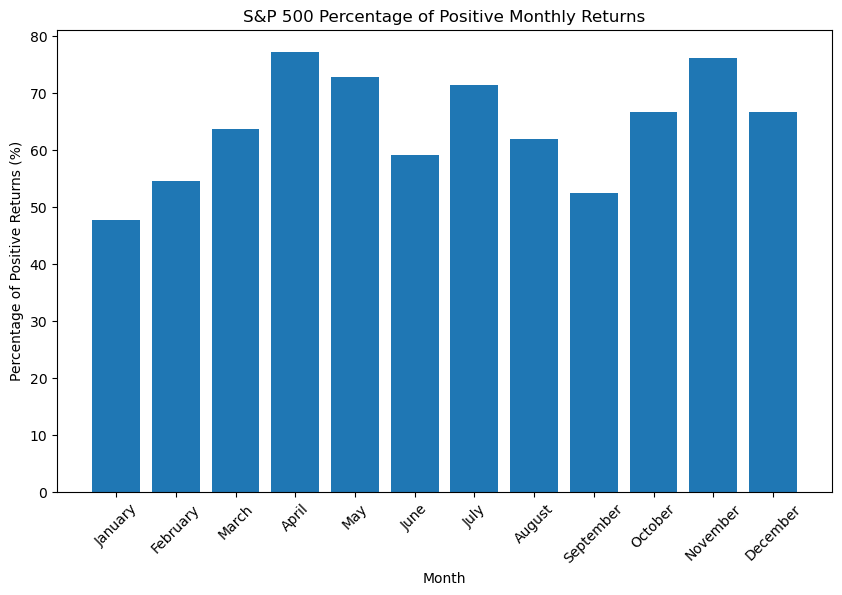

In [3]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), sp500_monthly_avg_return * 100)
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.title('S&P 500 Average Monthly Return')
plt.xticks(range(1, 13), month_names.values())
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), sp500_positive_month_percentage * 100)
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Returns (%)')
plt.title('S&P 500 Percentage of Positive Monthly Returns')
plt.xticks(range(1, 13), month_names.values())
plt.xticks(rotation=45)
plt.show()

[*********************100%***********************]  1 of 1 completed


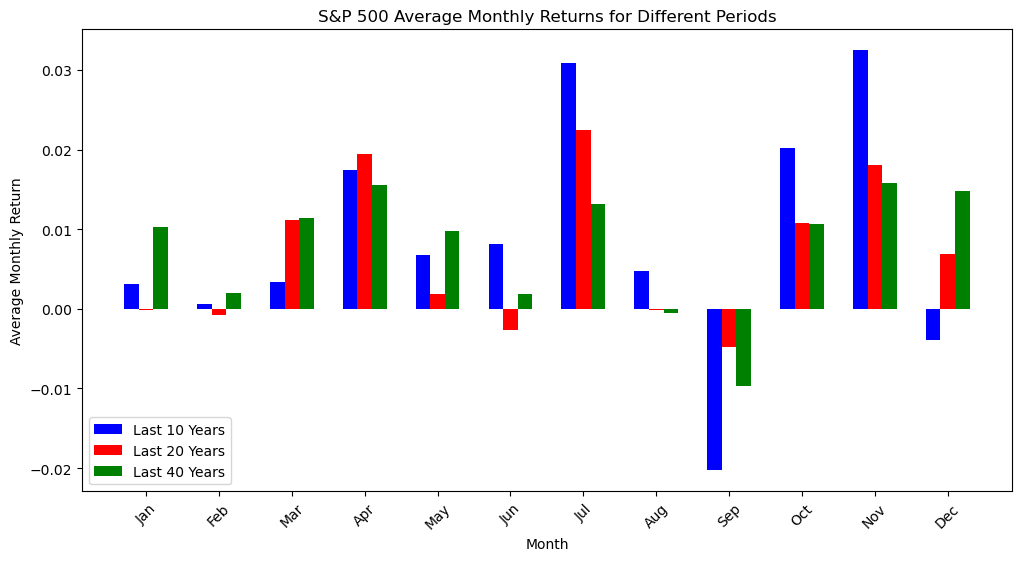

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download S&P 500 data
sp500_data = yf.download('^GSPC', start='1980-01-01')

# Resample to end of month and forward fill any missing values
sp500_data = sp500_data.resample('M').ffill()

# Calculate monthly returns
sp500_data['monthly_return'] = sp500_data['Close'].pct_change()

# Get the last 10, 20, 40 years of data
last_10_years = sp500_data.loc[sp500_data.index.year > sp500_data.index.year.max() - 10]
last_20_years = sp500_data.loc[sp500_data.index.year > sp500_data.index.year.max() - 20]
last_40_years = sp500_data.loc[sp500_data.index.year > sp500_data.index.year.max() - 40]

# Calculate average return for each month
avg_return_10_years = last_10_years.groupby(last_10_years.index.month)['monthly_return'].mean()
avg_return_20_years = last_20_years.groupby(last_20_years.index.month)['monthly_return'].mean()
avg_return_40_years = last_40_years.groupby(last_40_years.index.month)['monthly_return'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(avg_return_10_years.index - 0.2, avg_return_10_years.values, width=0.2, color='b', align='center', label='Last 10 Years')
ax.bar(avg_return_20_years.index, avg_return_20_years.values, width=0.2, color='r', align='center', label='Last 20 Years')
ax.bar(avg_return_40_years.index + 0.2, avg_return_40_years.values, width=0.2, color='g', align='center', label='Last 40 Years')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=months, rotation=45)

plt.title('S&P 500 Average Monthly Returns for Different Periods')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.legend(loc='lower left')

plt.show()

[*********************100%***********************]  1 of 1 completed


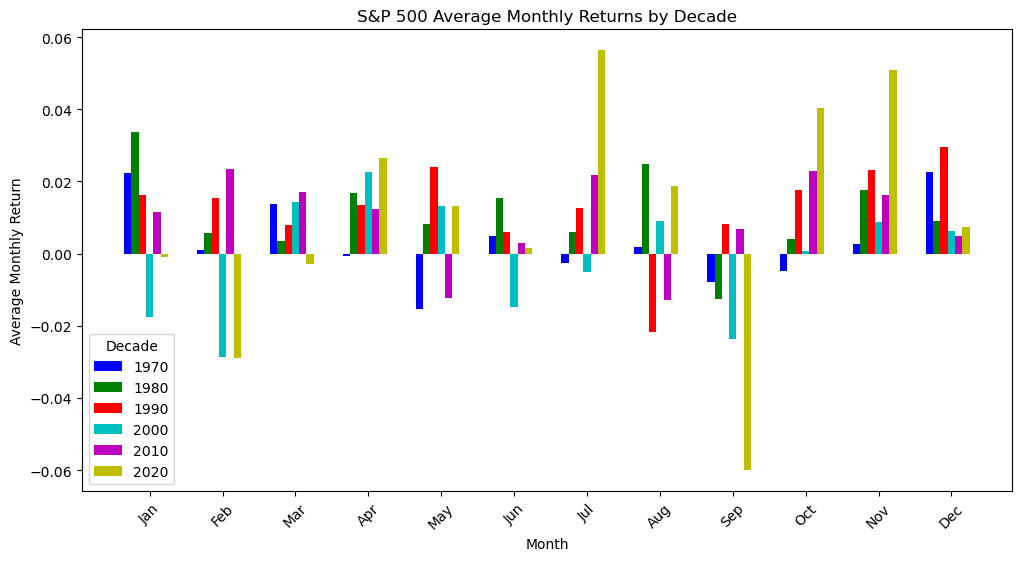

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download S&P 500 data
sp500_data = yf.download('^GSPC', start='1970-01-01')

# Resample to end of month and forward fill any missing values
sp500_data = sp500_data.resample('M').ffill()

# Calculate monthly returns
sp500_data['monthly_return'] = sp500_data['Close'].pct_change()

# Add a decade column to the DataFrame
sp500_data['decade'] = (sp500_data.index.year // 10) * 10

# Get data for each decade
decades = sorted(sp500_data['decade'].unique())
decade_data = {decade: sp500_data[sp500_data['decade'] == decade] for decade in decades}

# Calculate average return for each month of each decade
avg_returns = {decade: data.groupby(data.index.month)['monthly_return'].mean() for decade, data in decade_data.items()}

# Plotting
fig, ax = plt.subplots(figsize=(12,6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, (decade, avg_return) in enumerate(avg_returns.items()):
    ax.bar(avg_return.index + (i - len(avg_returns) / 2) * 0.1, avg_return.values, width=0.1, color=colors[i % len(colors)], align='center', label=str(decade))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=months, rotation=45)

plt.title('S&P 500 Average Monthly Returns by Decade')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.legend(title='Decade', loc='lower left')

plt.show()


In [6]:
# Initialize a DataFrame to store the seasonality data for each sector
seasonality_average_monthly_returns = pd.DataFrame()

# Define the width of each bar
width = 0.08

# Use the keys (sector codes) for the download and calculation steps
for sector_code in sectors.keys():
    # Download historical data for the current sector
    data = yf.download(sector_code, start=start_date, end=end_date)
    
    # Calculate the monthly returns
    data['monthly_return'] = data['Close'].resample('M').ffill().pct_change()
    
    # Drop NaN values
    data = data.dropna()

    # Calculate the average returns for each month
    average_monthly_returns = data.groupby(data.index.month)['monthly_return'].mean()
    
    # Append the data to the seasonality dataframes
    seasonality_average_monthly_returns = pd.concat([seasonality_average_monthly_returns, average_monthly_returns.rename(sectors[sector_code])], axis=1)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


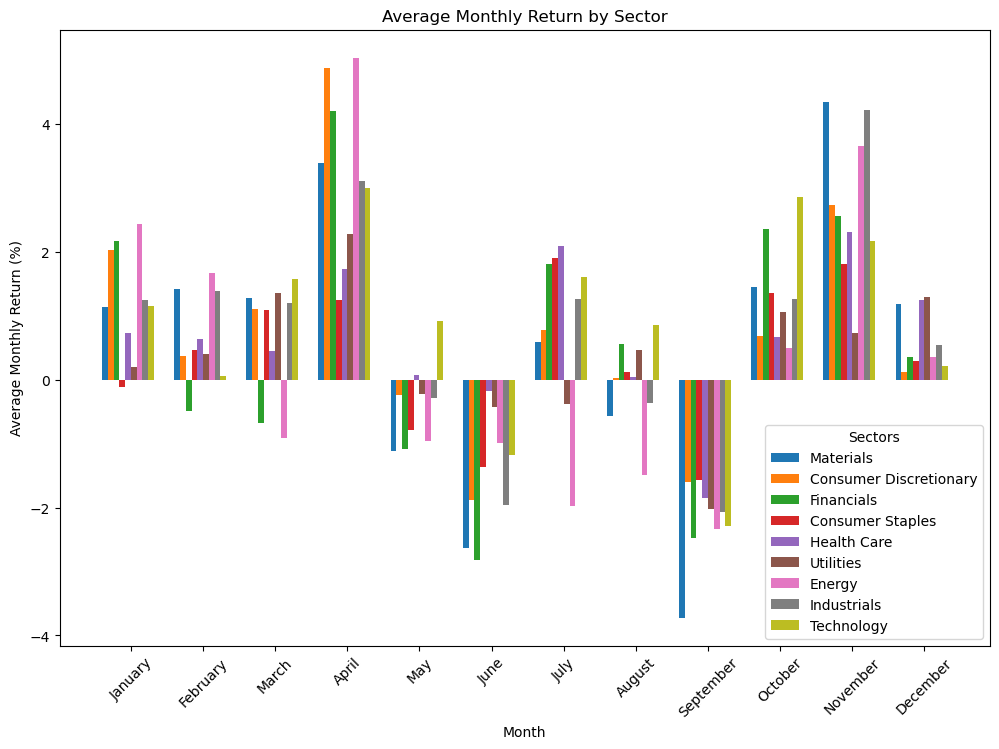

In [7]:

# Plotting
plt.figure(figsize=(12, 8))
for i, sector in enumerate(seasonality_average_monthly_returns.columns):
    plt.bar(np.arange(1, 13) + i * width, seasonality_average_monthly_returns[sector] * 100, width=width, label=sector)
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.title('Average Monthly Return by Sector')
plt.xticks(rotation=45)
plt.xticks(np.arange(1, 13) + width * len(sectors) / 2, month_names.values())
plt.legend(title="Sectors")
plt.show()

In [8]:
# Resample the data to ensure we have an entry for each day of the year
sp500_data_daily = sp500_data.resample('D').ffill()

# Calculate daily returns
sp500_data_daily['daily_return'] = sp500_data_daily['Close'].pct_change()

# Calculate cumulative returns
sp500_data_daily['cumulative_return'] = (1 + sp500_data_daily['daily_return']).cumprod()

# Reset cumulative return to 1 at the start of each year
sp500_data_daily['cumulative_return'] = sp500_data_daily.groupby(sp500_data_daily.index.year)['cumulative_return'].transform(lambda x: x / x.iloc[0])

# Create 'Day_of_year' column
sp500_data_daily['Day_of_year'] = sp500_data_daily.index.dayofyear

# Calculate average cumulative return for each day of the year
avg_cumulative_return_per_day = sp500_data_daily.groupby('Day_of_year')['cumulative_return'].mean().reset_index()

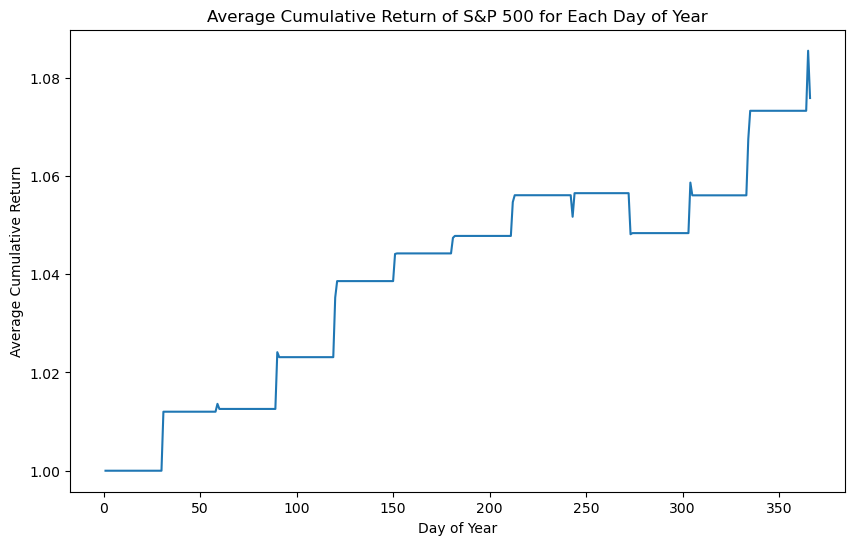

In [9]:
# Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(avg_cumulative_return_per_day['Day_of_year'], avg_cumulative_return_per_day['cumulative_return'])

# Set the title and labels
ax.set_title('Average Cumulative Return of S&P 500 for Each Day of Year')
ax.set_xlabel('Day of Year')
ax.set_ylabel('Average Cumulative Return')

plt.show()

In [10]:
import altair as alt
import yfinance as yf
import streamlit as st
import pandas as pd

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


@st.cache(allow_output_mutation=True)
def run(ticker):
    info = yf.Ticker(ticker).info
    if not info:
        return {
            "error": True
        }

    days_in_month = 22
    if "crypto" in info.get('quoteType').lower():
        days_in_month = 31

    data = yf.download(ticker, period='max', show_errors=False, progress=False)
    if data.empty:
        return {
            "error": True
        }

    df = pd.DataFrame({
        'return': yf.download(ticker, period='max', show_errors=False, progress=False)['Close'].pct_change().fillna(0)
    })
    # use full years only
    df = df[df.index >= df[df.index.month == 1].index[0]]
    df = df[df.index <= df[df.index.month == 12].index[-1]]

    # chart
    seasonal = {}
    for year in df.index.year.unique():
        seasonal[year] = df[df.index.year == year].reset_index()['return']
    seasonal = pd.DataFrame(seasonal)

    # old way (annual cumsum)
    # seasonal_returns = 100 * seasonal.dropna(how='all').mean(axis=1).cumsum()

    # monthly cumsum
    longest_year = seasonal[-1:].T.dropna().index[0]
    seasonal.index = df[df.index.year == longest_year].index.strftime('%Y%m')
    seasonal_returns = seasonal.dropna(how='all').groupby(seasonal.index).cumsum()
    seasonal_returns.reset_index(drop=True, inplace=True)
    seasonal_returns = seasonal_returns.dropna(how='all').mean(axis=1)

    expr = ''
    for idx, val in enumerate(range(0, len(seasonal), days_in_month)):
        try:
            expr += f"datum.label == {val} ? '{months[idx]}' : "
        except:
            pass
    expr += 'null'

    source = pd.DataFrame({
      'day': seasonal_returns.index,
      'returns': seasonal_returns.values
    })

    chart = (
        alt.Chart(source)
        .mark_line()
        .encode(
          x=alt.X(
            'day',
              title="Trading Day #",
              axis=alt.Axis(
              tickCount=df.shape[0],
              grid=False,
              labelExpr = expr,
            )
          ),
          y=alt.Y(
            'returns',
            title="Return %",
            scale=alt.Scale(domain=[seasonal_returns.min(), seasonal_returns.max()]),
            axis=alt.Axis(format='%')
            # labelExpr="format(datum.value, '~s') +'%'",
          )
        )
    )

    line = alt.Chart(pd.DataFrame({'returns': [0]})).mark_rule().encode(y='returns')

    # data
    monthly = {}
    for year in df.index.year.unique():
        yeardf = df[df.index.year == year]
        monthly[year] = yeardf.groupby(yeardf.index.month).sum() * 100

    data = pd.concat(monthly, axis=1)
    data.columns = [col[0] for col in data.columns]
    data.index = months

    summary = pd.DataFrame(data.mean(axis=1))
    summary.columns = ['Return %']

    return {
        "error": False,
        "title": f'{info.get("shortName", ticker)} Seasonal chart',
        "meta": f"{ticker} / {data.columns[0]} - {data.columns[-1]} ({len(data.columns)} years)",
        "chart": chart + line,
        "summary": summary.T,
        "data": data[data.columns[::-1]]
    }



st.set_page_config(page_title="Seasonal stock charts", page_icon='https://img.icons8.com/fluency/48/null/stocks-growth.png')

st.title("Seasonality stock charting")
st.markdown("""A little app that charts the seasonal returns of a stock or ETF.

- To check yahoo finance symbols: [yfinance](https://finance.yahoo.com/lookup/)
- Tools used: [yfinance](https://github.com/ranaroussi/yfinance), [Pandas](https://pandas.pydata.org/), [Altair](https://altair-viz.github.io/), and [Streamlit](https://streamlit.io/)
""")

st.write("***NOT A FINANCIAL ADVICE. USE AT YOUR OWN RISK.")
st.markdown("""---""")

ticker = st.text_input('Enter the asset ticker (Yahoo! Finance format)', '^NSEI')

if not ticker:
    st.error("Please select an asset.")
else:
    try:
        data = run(ticker)
    except:
        data = { "error": True}

    # data = run(ticker)
    # print(data)

    if data.get('error', True):
        st.error(f"Cannot find asset with ticker `{ticker}`. Please make sure this ticker is a valid Yahoo! Finance ticker.")

    else:

        st.markdown("""---""")
        st.subheader(data['title'])
        st.write(data['meta'])

        st.altair_chart(data['chart'], use_container_width=True)

        st.markdown("**Monthly average**")
        st.dataframe(data['summary'], use_container_width=True)

        st.markdown("**Raw returns**")
        st.dataframe(data['data'], use_container_width=True)

ModuleNotFoundError: No module named 'streamlit'